Implementing Gradient Descent


#### Do your necessary imports below 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


#### Load data1.csv

In [ ]:

df=pd.read_csv('data1.csv')



In [ ]:
df.head()

,x1,x2,y
0,4.170220,7.203245,153.916228
1,3.023326,1.467559,33.652484
2,1.862602,3.455607,68.218691
3,5.388167,4.191945,101.150179
4,2.044522,8.781174,174.900875


#### Plot the relationship of x1 and y

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


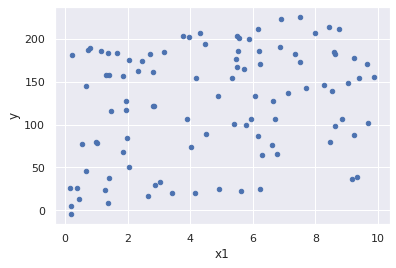

In [ ]:
df.plot.scatter(x="x1",y="y")


#### Plot the relationship of x2 and y

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


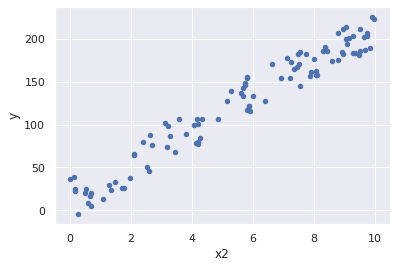

In [ ]:
df.plot.scatter(x="x2",y="y")


In [ ]:
df.corr()

,x1,x2,y
x1,1.000000,0.044438,0.271714
x2,0.044438,1.000000,0.973460
y,0.271714,0.973460,1.000000


## Given data1.csv, with independent features named "x1" and "x2" and target named "y", where 

## $y= 5 x_1 + 20 x_2 - 10 + np.random.uniform(-1,1)$

## implement batch gradient descent code, completing the tasks below:

Function named gradient_descent(X,y,learning_rate,iterations) , where X is your feature matrix, y is your target vector, learning_rate to be set between (0-1) and iterations for maximum number of iterations to run. The function must return the coefficient vector and mean squared errors vector for all iterations. 



In [ ]:
def gradient_descent(X,y,learning_rate=0.01,iterations=1000):
  cost_history = []
  theta = np.random.rand(1,X.shape[1])

  for i in range(iterations):
    y_hat = theta.dot(X.T).T

    theta = theta - learning_rate * (1/len(y)) * (X*((y_hat - y))).sum(axis=0)
    new_y_hat = theta.dot(X.T).T
    mse = np.power((new_y_hat - y),2).sum()/len(y)
    #print (i,". iter", mse, theta)
    #print("------------------------------------------------------------------")
    
    cost_history.append(mse)

  return theta, cost_history

In [ ]:
X = df[['x1','x2']].to_numpy()
X = np.append(X,np.ones(shape=(len(X),1)), axis =1)
y = df.y.to_numpy().reshape(len(X),1)

In [ ]:
theta, costs = gradient_descent(X,y,learning_rate=0.01, iterations=1000)
theta

array([[ 4.78211508, 19.75239598, -7.18298126]])

In [ ]:
theta, cost = gradient_descent(X,y,learning_rate=0.001, iterations=1000)
theta

array([[ 4.17851625, 19.09980092,  0.41652551]])

In [ ]:
theta, cost = gradient_descent(X,y,learning_rate=0.0001, iterations=1000)
theta

array([[ 6.90032732, 16.44974169,  2.69385606]])

In [ ]:
theta, cost = gradient_descent(X,y,learning_rate=0.031, iterations=1000)
theta

array([[ 4.99443871, 19.98105348, -9.85027617]])

In [ ]:
theta, cost = gradient_descent(X,y,learning_rate=0.026, iterations=6000)
theta

array([[ 5.00348771, 19.99079861, -9.96395332]])

Trying learning rates such as 0.01, 0.001, 0.0001 etc. as suitable; if the weights are diverging, stop. 

Coefficients (theta), corresponding MSE and the learning rates 





In [ ]:
theta, cost = gradient_descent(X,y,learning_rate=0.027, iterations=6000)
theta

Streaming output truncated to the last 5000 lines.
3500 . iter 0.3264697243340502 [[ 5.00348707 19.99079792 -9.96394529]]
------------------------------------------------------------------
3501 . iter 0.326469724333972 [[ 5.00348707 19.99079792 -9.96394532]]
------------------------------------------------------------------
3502 . iter 0.3264697243338928 [[ 5.00348708 19.99079793 -9.96394535]]
------------------------------------------------------------------
3503 . iter 0.3264697243338147 [[ 5.00348708 19.99079793 -9.96394538]]
------------------------------------------------------------------
3504 . iter 0.3264697243337356 [[ 5.00348708 19.99079793 -9.96394542]]
------------------------------------------------------------------
3505 . iter 0.3264697243336601 [[ 5.00348708 19.99079793 -9.96394545]]
------------------------------------------------------------------
3506 . iter 0.32646972433358384 [[ 5.00348709 19.99079794 -9.96394548]]
--------------------------------------------------

array([[ 5.00348771, 19.99079861, -9.96395333]])

In [ ]:
# Learning Rate = 0.027
# MSE = 0.326469724324208
# theta0 (intercept) = -9.96395333
# theta1 (coef. for x1) = 5.00348771
# theta2 (coef. for x2) = 19.99079861
# Number of iterations = 5787

Selecting a learning rate and plot MSE for each iteration:

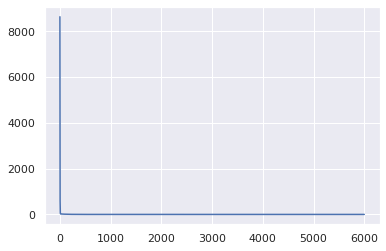

In [ ]:
plt.plot(np.arange(len(cost)),cost)
plt.show()



Using Scikit LinearRegression model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lrModel = lr.fit(np.c_[df.x1,df.x2],df.y)

In [ ]:
lrModel.coef_

array([ 5.00348771, 19.99079861])

In [ ]:
#No difference same coefficients.

When we increase the learnin rate also the steps increase. On Convex line it jumps unstable points and this causes passing the goal value. For example if we select a learning rate over 0.5 and iteration 1000, the result value becomes 'nan'. Also an error is received.

In [ ]:
theta, cost = gradient_descent(X,y,learning_rate=0.05, iterations=1000)
theta

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in power
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in subtract
  


array([[nan, nan, nan]])

The reason we can't find exact theta values (theta1=5, theta2=20, theta0=-10)

The reason why can't reach exact theta values on y formula can be;
- Learning rate value might be large. So it might pass the exact value.
- Iteration number might be small. So we can increase it until reach the exact value.
- The feature row count can be small. If there is more value the, we can close to the exact parameter.
- There can be a randomness in y feature. I think the real problem is it in here. Because even I change  the iteration to very large numbers or change learning rate, after an iteration value the values become the same and don't change. Also I found the same value with the Scikit LinearRegression model.